## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzs we set upes a
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# row number
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
total_user = df.user_id.nunique()
total_user

290584

d. The proportion of users converted.

In [5]:
# Achieve the converted users and calculate the number of unique users
converted_user = df.query('converted == 1').user_id.nunique()
converted_user

35173

In [6]:
# proportion of users converted
converted_user/total_user

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
df.query('(group == "treatment" and landing_page == "old_page") or (group == "control" and landing_page == "new_page")').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [9]:
df.isnull().sum().any()

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# Copy a new dataset not to use the same memory space
df2 = df.copy()

In [11]:
# Remove the mismatch data
df2 = df2.query('((group == "treatment") == (landing_page == "new_page")) == True')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [15]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
# Choose the recent one
df2.drop(1899, inplace=True)

# Check is it dropped?
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
(df2.landing_page == "new_page").mean()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Considering the conversion rate of **control group** and **treatment group** the rate dropped from `12.04%` to `11.88%` so its hard to say there is a sufficient evidence to change to new page. So we can think that the total number of **treatment group** might be too little so the it might not accurately reflect the characteristics of the groups. But when we check the ratio of the **control** and **treatment group** it is approximately `50:50` so its showing us that the old page is better than the old page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0 : P_{new} - P_{old} \leq 0$$
$$H_1 : P_{new} - P_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
# Under the null the old page and new page will be the same or old one is better
# We assume p_new and p_old is equal.
# So we need to calculate converated rate of ab_test.csv 
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
# Same as p_new
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
n_new = df2.query('group == "treatment"').count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
n_old = df2.query('group == "control"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# use binomial to simulate
new_page_converted = np.random.binomial(1, p_new, size=n_new).mean()
new_page_converted

0.1180854724382355

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
# use binomial to simulate
old_page_converted = np.random.binomial(1, p_old, size=n_old).mean()
old_page_converted

0.11873425389264425

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
# use e) and f) convert value
obs_diff = new_page_converted - old_page_converted
obs_diff

-0.00064878145440874779

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
new_page_converted_samples = np.random.binomial(n_new, p_new, size=10000)/n_new
old_page_converted_samples = np.random.binomial(n_old, p_old, size=10000)/n_old
p_diffs = new_page_converted_samples - old_page_converted_samples
p_diffs

array([  2.52683155e-04,   2.32438609e-03,  -3.11653210e-04, ...,
         6.68854440e-05,   2.66161325e-03,  -1.04139587e-03])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

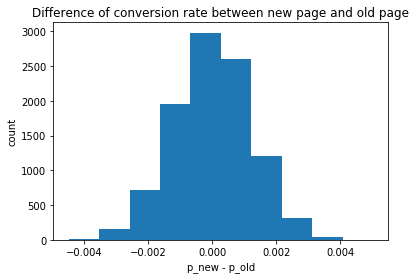

In [29]:
plt.hist(p_diffs)
plt.title("Difference of conversion rate between new page and old page")
plt.xlabel("p_new - p_old")
plt.ylabel("count");

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
# Calculate the actual data
new_conversion_rate = df2.query('group == "treatment"').converted.mean()
old_conversion_rate = df2.query('group == "control"').converted.mean()
obs_diff = new_conversion_rate - old_conversion_rate
(p_diffs > obs_diff).mean()

0.90500000000000003

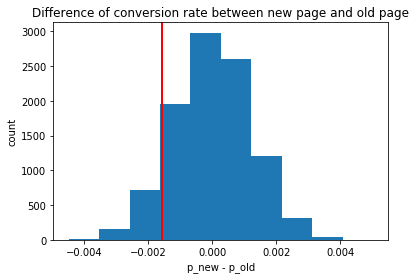

In [31]:
# Draw axvline to see more clear
plt.hist(p_diffs)
plt.axvline(x=obs_diff, color='r', linewidth=2)
plt.title("Difference of conversion rate between new page and old page")
plt.xlabel("p_new - p_old")
plt.ylabel("count");

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- The value we calculated at j is called `p value`
- `p value` definition is if $H_0$ is true, the probability of obtaining the observed statistics or one more extreme in favor of the alternative hypothesis
- This value is also intrepreted as `Type I error`
- The `p value` calculated here is **0.9055** and we set $\alpha=0.05$. So we have evidence that our statistic was likely to come from the null hypothesis. So therefore we do not have evidence to reject the null. So this could be interpreted as the new page conversion rate will be same or worser than the old page. Also if we think this as `Type I error` **90.5%** error rate will came out if we think the alternative is true. So it's hard to say we could accept alternative hypothesis. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

# number of total converted number for each new and old page
convert_old = df2.query('landing_page == "old_page" and converted == 1').count()[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').count()[0]
n_old = df2.query('landing_page == "old_page"').count()[0]
n_new = df2.query('landing_page == "new_page"').count()[0]

# check the value
print("convert_old : {}\nconvert_new : {}\nn_old : {}\nn_new : {}".format(convert_old, convert_new, n_old, n_new))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


convert_old : 17489
convert_new : 17264
n_old : 145274
n_new : 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
stat, pval = sm.stats.proportions_ztest(count=[convert_old, convert_new],
                                        nobs=[n_old, n_new],
                                        alternative='smaller')
print("z-score : {}\np-value : {}".format(stat, pval))

z-score : 1.3109241984234394
p-value : 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- For `p-value` the $\alpha$ is set to **0.05** (for z-table **0.95**) and the `z-score` of this should be near **1.66** according to the z-table.<br><br>
    Below **-1.31** and **0.095** is a transformed value to fit the z-table<br><br>
- `z-score` calculated by `proportions_ztest` **-1.31 < 1.66**
- `p-value` calculated by `proportions_ztest` **0.095 < 0.95**

- This result is showing that we have failed to reject the null hypothesis and the conversion rate of new pages might be same or lower than the old pages.
- Yes, this agrees with parts `j` and `k`. This is showing the same p-value

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

The response variable is 0, 1(categorical variable) so we can use `logistic regression` for this prediction. For linear regression we use when we are predicting the numeric variable. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
# For view
df2.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [35]:
# Add an intercept column
df2['intercept'] = 1

# Add ab_page column which is 1 when an individual receives the treatment and 0 if control
df2['ab_page'] = pd.get_dummies(df2.group).treatment

# Check is it modified right
df2.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
# Fix the following error
# AttributeError: module 'scipy.stats' has no attribute 'chisqprob' 
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# Show the summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 21 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        16:04:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

- The `p-value` shown at the summary for `ab_page` is **0.190**
<br><br>
- The hypothesis for **logistic regression** is following<br>
$H_0 : $ there is **no relationship between** `X(ab_page)` and `y(converted)` variable<br>
$H_1 : $ there is **relationship between** `X(ab_page)` and `y(converted)` variable
<br><br>
- The hypothesis for **Part II** is following<br>
$H_0 : P_{new} - P_{old} \leq 0$<br>
$H_1 : P_{new} - P_{old} > 0$
<br><br>
First of all, the hypothesis is totally different. Relationship to comparing. Also, **logistic regression** is using the `0, 1` values which indicates **exists?** and **Part II** is using `float` values which indicates what is the **conversion rate difference between new and old page?** Actually it's nonsense to compare the the **aggregated approach** from statistics and **individual approach** of the machine learning.
<br><br>
- It is very reasonable that `p-value` differs from **logistic regression** and **Part II** because they have difference purpose. So, each `p-value` **0.190** and **0.905** are talking different things.
<br><br>
**logistic regression** : **0.190** means the null is not rejected and there is no relationship between `X(ab_page)` and `y(converted)` variable<br>
**Part II** : **0.905** means the the null is not rejected and the `new page` is same as `old page` or worser.
<br><br>
- Also, for **logistc regression** it is `two tailed test` and **Part II** is `one tailed test`
> We could see p-value matches same if we calculate the part 2's one tailed test p-value to two tailed test! 0.905 -> 0.095 (calculate the p-value area of logistic regression from left to right) and multiply 2 to get 0.190(0.095 * 2). Surprisingly even hypothesis is different the implied context is same for logistic regression and part 2! 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

If we are only going to show the statistic results then just having `X(ab_page)` might be enough. But we have to predict `will the page influence the users conversion?` Even the new page perfectly lead the conversion of the user, what we can know is **The new page influence the conversion**. We cannot know further like exactly which factor lead to conversion. So, we need more factors to consider to find out the mystery of the user conversion.
<br><br>
Also, the **regression model** is showing that there is no relationship between our `X(ab_page)` and `y(converted)` variable. It means we need to consider other factors that influence the `y(converted)` variable. The more factor added the more clue we got. 
<br><br>
But just adding a lot of factor doesn't help prediction, it just makes the model confused. We need to consider the factors that seems make sense to predict the conversion. Also, we need to add suitable number of factors. Because if we add too much factors even they all are helpful to predict conversion rate the model might end up underfitting due to high complexity of the dataset. We have to find the right number of factors that could fit our model using to predict.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
df3 = pd.read_csv('countries.csv')
df3.head(5)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [51]:
# check informations of the dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [52]:
# Check unique values inside the country column
df3.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [50]:
# join two dataset using the user_id
df4 = df3.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df4.head(5)

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [54]:
# Dummy variable for country column
df4 = df4.join(pd.get_dummies(df4['country']))

# Check dataframe
df4.head(5)

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [55]:
# logistic regression
# Use 'CA' as baseline
logit_mod = sm.Logit(df4['converted'], df4[['intercept', 'ab_page', 'UK', 'US']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 21 May 2020   Pseudo R-squ.:               2.323e-05
Time:                        17:22:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

If our $\alpha$ is set to **0.05** it is hard to say there is a explanatory variable that is statistically significant for prediction. Besides, the logistic regression model shows the following.

In [70]:
print("For each 1 unit decrease in new page, {:.2f} times more likely to be converted, holding all other variables constant.".format(np.exp(0.0149)))
print("For each 1 unit increase in UK, the {:.2f} times more likely to be converted, holding all other variables constant.".format(np.exp(0.0506)))
print("For each 1 unit increase in US, the {:.2f} times more likely to be converted, holding all other variables constant.".format(np.exp(0.0408)))

For each 1 unit decrease in new page, 1.02 times more likely to be converted, holding all other variables constant.
For each 1 unit increase in UK, the 1.05 times more likely to be converted, holding all other variables constant.
For each 1 unit increase in US, the 1.04 times more likely to be converted, holding all other variables constant.


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [72]:
# Combine two columns for interaction
df4['combined_UK_page'] = df4['UK']*df4['ab_page']
df4['combined_US_page'] = df4['US']*df4['ab_page']

# check dataframe
df4.head(5)

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,combined_UK_page,combined_US_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [73]:
# logistic regression
# Use 'CA' as baseline
logit_mod = sm.Logit(df4['converted'], df4[['intercept', 'ab_page', 'UK', 'US', 'combined_UK_page', 'combined_US_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 21 May 2020   Pseudo R-squ.:               3.482e-05
Time:                        17:51:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page             -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK                   0.0118      0.040      0.296      0.767      -0.066       0.090
US                   0.0175      0.038      0.465      0.642      -0.056       0.091
combined_UK_page     0.0783      0.057      1.378      0.168      -0.033       0.190
combined_US_page     0.0469      0.054      0.872      0.383      -0.059       0.152
====================================================================================
"""

Even we added an interaction term for each `US` and `UK` all explanatory variables are not statistically significance for prediction because there is no `p-value` that is under **0.05**. Besides, the logistic regression model shows the following.

In [74]:
print("For each 1 unit decrease in new page, {:.2f} times more likely to be converted, holding all other variables constant.".format(np.exp(0.0674)))
print("For each 1 unit increase in UK, the {:.2f} times more likely to be converted, holding all other variables constant.".format(np.exp(0.0118)))
print("For each 1 unit increase in US, the {:.2f} times more likely to be converted, holding all other variables constant.".format(np.exp(0.0175)))
print("For each 1 unit increase in UK & page interaction, the {:.2f} times more likely to be converted, holding all other variables constant.".format(np.exp(0.0783)))
print("For each 1 unit increase in US & page interaction, the {:.2f} times more likely to be converted, holding all other variables constant.".format(np.exp(0.0469)))

For each 1 unit decrease in new page, 1.07 times more likely to be converted, holding all other variables constant.
For each 1 unit increase in UK, the 1.01 times more likely to be converted, holding all other variables constant.
For each 1 unit increase in US, the 1.02 times more likely to be converted, holding all other variables constant.
For each 1 unit increase in UK & page interaction, the 1.08 times more likely to be converted, holding all other variables constant.
For each 1 unit increase in US & page interaction, the 1.05 times more likely to be converted, holding all other variables constant.


### conclusion
We wanted to find a factor that could predict the conversion but here we tested the `page` and `country` factor but **failed to reject the null hypothesis**(No relationship between explanatory variable and response variable).
<br><br>
There is a slight difference between countrys that influence the conversion but there is no statistic significance when we checked the `p-value` so this doesn't matter at all.
<br><br>
Further, we could add more factors like `layout of webpage, content, time etc` to find the factor that could influence the prediction.

**Limitations**

- Dataset size was 290584 so it was enough, but only 2 factors are too little to predict the conversion.
- We had rows that doesn't match the page and group correctly. Even if the data appear to be correctly displayed, the possibility of some noise mixed cannot be ruled out.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [75]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0